# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [31]:
# Import numpy and pandas

import itertools
import numpy as np
#import matplotlib.pyplot as plt
import pandas as pd
import matplotlib

# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [32]:
# Run this code:

sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [33]:
# Your code here:
sensor.head()


,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [34]:
# Your code here:
sensor.isnull().sum()


attitude.roll         0
attitude.pitch        0
attitude.yaw          0
gravity.x             0
gravity.y             0
gravity.z             0
rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
dtype: int64

How many rows and columns are in our data?

In [35]:
# Your code here:
sensor.shape

#1751 filas y 12 columnas

(1751, 12)

To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [36]:
# Your code here:

time_index = pd.date_range(start = '1/1/2018 00:00:00', end = '1/01/2018 00:29:10', periods = 1751)
time_index

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:00:01',
               '2018-01-01 00:00:02', '2018-01-01 00:00:03',
               '2018-01-01 00:00:04', '2018-01-01 00:00:05',
               '2018-01-01 00:00:06', '2018-01-01 00:00:07',
               '2018-01-01 00:00:08', '2018-01-01 00:00:09',
               ...
               '2018-01-01 00:29:01', '2018-01-01 00:29:02',
               '2018-01-01 00:29:03', '2018-01-01 00:29:04',
               '2018-01-01 00:29:05', '2018-01-01 00:29:06',
               '2018-01-01 00:29:07', '2018-01-01 00:29:08',
               '2018-01-01 00:29:09', '2018-01-01 00:29:10'],
              dtype='datetime64[ns]', length=1751, freq=None)

Assign the time series index to the dataframe's index.

In [37]:
# Your code here:

sensor.insert(loc = 0, column = 'Time', value = time_index)

In [44]:
#Set index

sensor = sensor.set_index('Time')


In [45]:
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
Time,,,,,,,,,,,,
2018-01-01 00:00:00,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
2018-01-01 00:00:01,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2018-01-01 00:00:02,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
2018-01-01 00:00:03,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
2018-01-01 00:00:04,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

<ipython-input-50-78f1e7a14f8f>:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = sm.tsa.seasonal_decompose(sensor['userAcceleration.x'], model = 'additive', freq = 60)


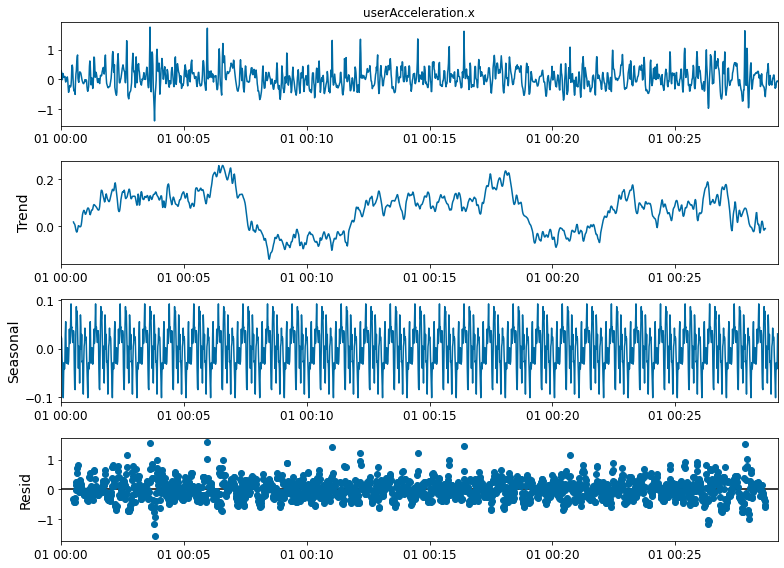

In [50]:
# Your code here:
import statsmodels.api as sm
matplotlib.rcParams['figure.figsize'] = 11,8
decomposition = sm.tsa.seasonal_decompose(sensor['userAcceleration.x'], model = 'additive', freq = 60)
fig = decomposition.plot()
plt.show()


Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

<ipython-input-51-7dc88f63f682>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = sm.tsa.seasonal_decompose(sensor['rotationRate.x'], model = 'additive', freq = 60)


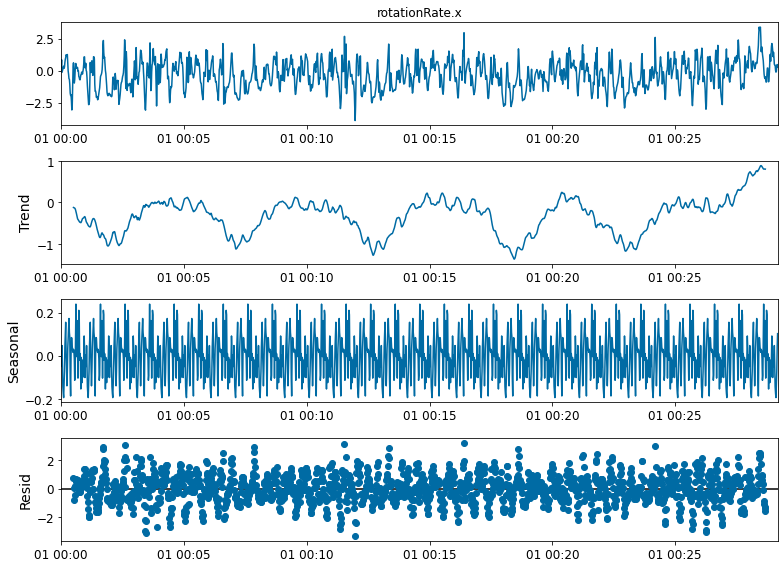

In [51]:
matplotlib.rcParams['figure.figsize'] =11,8
decomposition = sm.tsa.seasonal_decompose(sensor['rotationRate.x'], model = 'additive', freq = 60)
fig =decomposition.plot()
plt.show()


# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

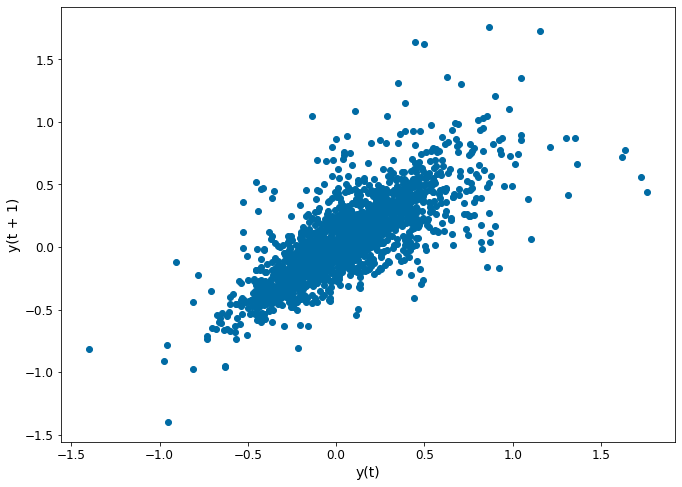

In [55]:
# Your code here:
pd.plotting.lag_plot(sensor['userAcceleration.x']);


Create a lag plot for `rotationRate.x`

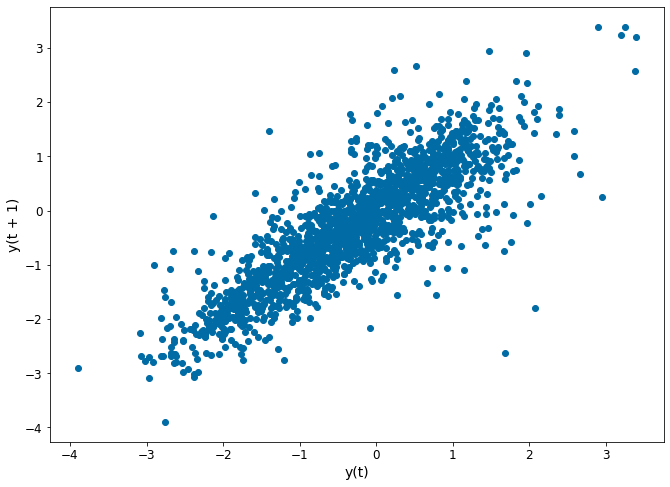

In [57]:
# Your code here:
pd.plotting.lag_plot(sensor['rotationRate.x']);


What are your conclusions from both visualizations?

In [11]:
# Your conclusions here:
#There is a positive correlation


The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [62]:
# Your code here:

from statsmodels.tsa.stattools import adfuller

dftest_1 = adfuller(sensor['userAcceleration.x'] ,autolag = None)
dftest_2 = adfuller(sensor['rotationRate.x'] ,autolag = None)

print(dftest_1)
print(dftest_2)

print(f'Prueba estadistica {dftest_1[0]}')
print(f'P-value  {dftest_1[1]}')

print(f'Prueba estadistica {dftest_2[0]}')
print(f'P-value  {dftest_2[1]}')

(-8.160095026835933, 9.19314770571882e-13, 25, 1725, {'1%': -3.4341465551936534, '5%': -2.863216966926812, '10%': -2.567662770090317})
(-5.26986062508642, 6.320230335912249e-06, 25, 1725, {'1%': -3.4341465551936534, '5%': -2.863216966926812, '10%': -2.567662770090317})
Prueba estadistica -8.160095026835933
P-value  9.19314770571882e-13
Prueba estadistica -5.26986062508642
P-value  6.320230335912249e-06


What are your conclusions from this test?

In [13]:
# Your conclusions here:

# Both values are negative, whichs means data is stationary with a 99% of confidence

Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [85]:
# Your code here:
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0], x[1], x[2], 10) for x in list(itertools.product(p,d,q))]

import statsmodels.api as sm

y = sensor['userAcceleration.x']

for param in pdq:
    for param_estacionales  in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_estacionales,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print(f'ARIMA {param} x {param_estacionales}12 - AIC:{results.aic}')
        except:
            continue
mod = sm.tsa.statespace.SARIMAX(y,
                                            order=(1,1,1),
                                            seasonal_order=(1, 1, 0, 12),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
results = mod.fit()


/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 0) x (0, 0, 0, 10)12 - AIC:1287.3915804550895
ARIMA (0, 0, 0) x (0, 0, 1, 10)12 - AIC:1285.8847944598144
ARIMA (0, 0, 0) x (0, 1, 0, 10)12 - AIC:2398.897540288772


/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 0) x (0, 1, 1, 10)12 - AIC:1272.7472282641538


/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 0) x (1, 0, 0, 10)12 - AIC:1285.6455599570895


/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 0) x (1, 0, 1, 10)12 - AIC:1287.8952811035567


/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 0) x (1, 1, 0, 10)12 - AIC:1946.1646123809953


/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 0) x (1, 1, 1, 10)12 - AIC:1282.9046185941872


/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 1) x (0, 0, 0, 10)12 - AIC:-103.81446251518177


/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 1) x (0, 0, 1, 10)12 - AIC:-96.57797934609046


/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 1) x (0, 1, 0, 10)12 - AIC:1007.8038466242547


/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 1) x (0, 1, 1, 10)12 - AIC:-85.28689106306636


/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 1) x (1, 0, 0, 10)12 - AIC:-98.64397523526736


/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 1) x (1, 0, 1, 10)12 - AIC:-107.56007188693245


/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 1) x (1, 1, 0, 10)12 - AIC:555.2670981464182


/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 1) x (1, 1, 1, 10)12 - AIC:-77.16059965871713
ARIMA (0, 1, 0) x (0, 0, 0, 10)12 - AIC:-50.47234722470161


/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 0) x (0, 0, 1, 10)12 - AIC:-41.604762193738296
ARIMA (0, 1, 0) x (0, 1, 0, 10)12 - AIC:1112.4007604255637


/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 0) x (0, 1, 1, 10)12 - AIC:3.435419280769196


/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 0) x (1, 0, 0, 10)12 - AIC:-42.607747687670496


/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 0) x (1, 0, 1, 10)12 - AIC:-39.808004318169


/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 0) x (1, 1, 0, 10)12 - AIC:623.0900307908311


/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 0) x (1, 1, 1, 10)12 - AIC:11.18867258549895


/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 1) x (0, 0, 0, 10)12 - AIC:-312.4422571789769


/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 1) x (0, 0, 1, 10)12 - AIC:-300.26597216975756


/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 1) x (0, 1, 0, 10)12 - AIC:888.631767544156


/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 1) x (0, 1, 1, 10)12 - AIC:-254.07420641711542


/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 1) x (1, 0, 0, 10)12 - AIC:-302.16998429769217


/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 1) x (1, 0, 1, 10)12 - AIC:-298.3053211984444


/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 1) x (1, 1, 0, 10)12 - AIC:369.66963709300626


/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 1) x (1, 1, 1, 10)12 - AIC:-252.07414171324206


/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 0) x (0, 0, 0, 10)12 - AIC:-266.1230964616295


/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 0) x (0, 0, 1, 10)12 - AIC:-255.93420988760602


/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/Users/stephaniecortes/opt

ARIMA (1, 0, 0) x (0, 1, 0, 10)12 - AIC:892.8311819465806
ARIMA (1, 0, 0) x (0, 1, 1, 10)12 - AIC:-216.10758951370326


/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 0) x (1, 0, 0, 10)12 - AIC:-256.01079364566215


/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 0) x (1, 0, 1, 10)12 - AIC:-254.21414555210998


/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 0) x (1, 1, 0, 10)12 - AIC:410.6376502371056


/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 0) x (1, 1, 1, 10)12 - AIC:-207.9042016270517


/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 1) x (0, 0, 0, 10)12 - AIC:-660.111220585271


/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 1) x (0, 0, 1, 10)12 - AIC:-646.2550021410996


/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 1) x (0, 1, 0, 10)12 - AIC:533.9942776530881


/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 1) x (0, 1, 1, 10)12 - AIC:-607.9512174335295


/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 1) x (1, 0, 0, 10)12 - AIC:-647.3939366107281


/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 1) x (1, 0, 1, 10)12 - AIC:-644.3340947071123


/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 1) x (1, 1, 0, 10)12 - AIC:25.306336983763977


/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 1) x (1, 1, 1, 10)12 - AIC:-605.9512157201848


/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 0) x (0, 0, 0, 10)12 - AIC:-220.3724906366563


/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 0) x (0, 0, 1, 10)12 - AIC:-209.46674238729565
ARIMA (1, 1, 0) x (0, 1, 0, 10)12 - AIC:977.4538123210345


/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 0) x (0, 1, 1, 10)12 - AIC:-164.24776948235194


/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 0) x (1, 0, 0, 10)12 - AIC:-209.47118850266605


/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 0) x (1, 0, 1, 10)12 - AIC:-207.4759351943797


/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 0) x (1, 1, 0, 10)12 - AIC:461.8509163297949


/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 0) x (1, 1, 1, 10)12 - AIC:-162.24776582763909


/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 1) x (0, 0, 0, 10)12 - AIC:-311.401045309499


/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 1) x (0, 0, 1, 10)12 - AIC:-299.20959818409347


/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 1) x (0, 1, 0, 10)12 - AIC:886.7832430832683


/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 1) x (0, 1, 1, 10)12 - AIC:-252.9297354784146


/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 1) x (1, 0, 0, 10)12 - AIC:-300.1659461188468


/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 1) x (1, 0, 1, 10)12 - AIC:-297.25913128937145


/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 1) x (1, 1, 0, 10)12 - AIC:370.6104730651927


/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 1) x (1, 1, 1, 10)12 - AIC:-250.92972775025316


/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/Users/stephaniecortes/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'


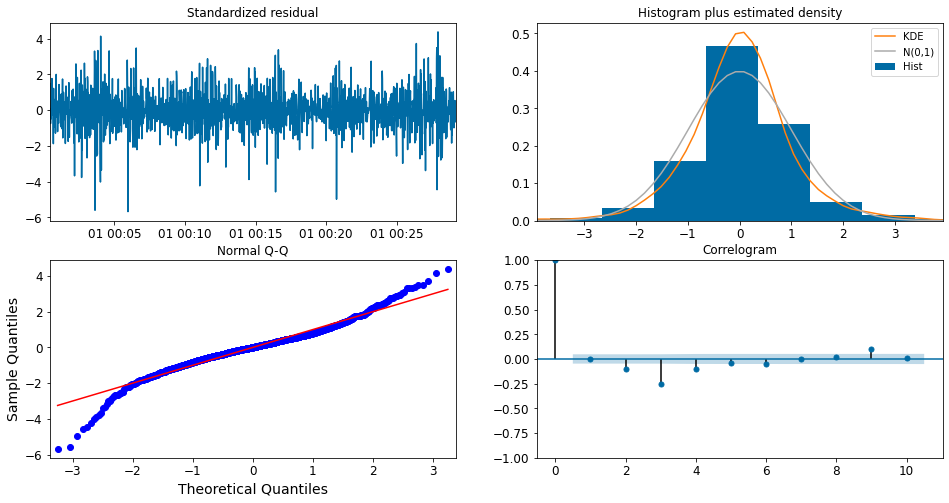

In [87]:
results.plot_diagnostics(figsize=(16,8))
plt.show()

To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [97]:
predicciones_1 = results.get_prediction(start = pd.to_datetime('1/1/2018 00:00:00'))

pred_ci = predicciones.conf_int()
pred_ci

,lower userAcceleration.x,upper userAcceleration.x
2018-01-01 00:00:00,-3394.757202,3394.757202
2018-01-01 00:00:01,-2772.691266,2773.271145
2018-01-01 00:00:02,-2772.467196,2772.910063
2018-01-01 00:00:03,-2772.672518,2772.704370
2018-01-01 00:00:04,-2772.696482,2772.680405
...,...,...
2018-01-01 00:29:06,-0.692676,0.366680
2018-01-01 00:29:07,-0.777971,0.281385
2018-01-01 00:29:08,-0.444770,0.614586
2018-01-01 00:29:09,-0.624270,0.435086


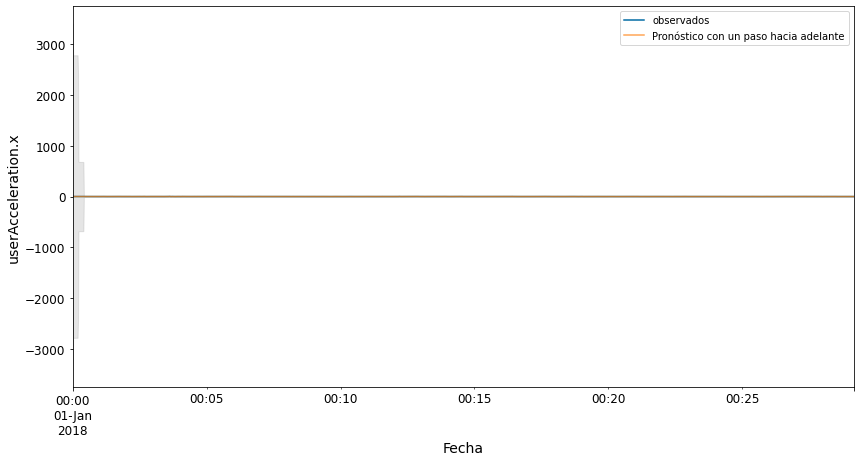

In [94]:
#Graficar nuestra predicción
ax = y['2014':].plot(label='observados')
predicciones_1.predicted_mean.plot(ax=ax, label='Pronóstico con un paso hacia adelante', alpha=.7, figsize=(14,7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:,0],
                pred_ci.iloc[:,1],
                color='gray',
                alpha=0.2)
ax.set_xlabel('Fecha')
ax.set_ylabel('userAcceleration.x')
plt.legend()
plt.show()

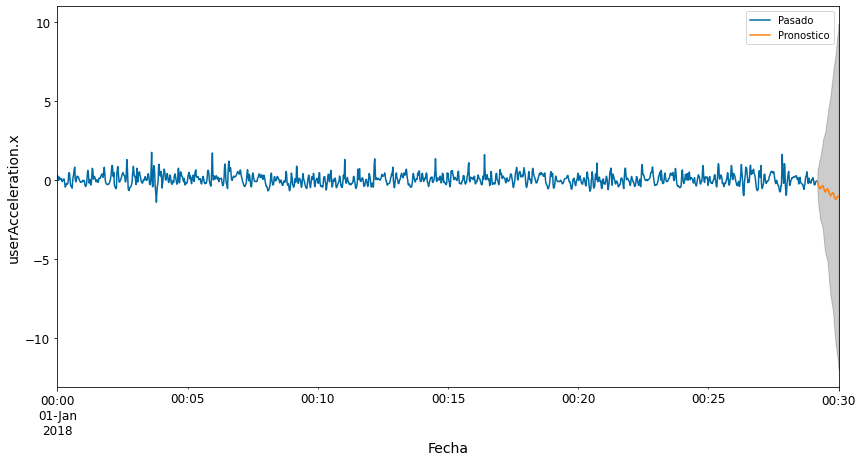

In [92]:
prediccion_futuro = results.get_forecast(steps=50)
pred_ci = prediccion_futuro.conf_int()
ax = y.plot(label='Pasado', figsize=(14,7))
prediccion_futuro.predicted_mean.plot(ax=ax, label='Pronostico')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:,0],
                pred_ci.iloc[:,1],
                color='k',
                alpha=0.2)
ax.set_xlabel('Fecha')
ax.set_ylabel('userAcceleration.x')
plt.legend()
plt.show()

In [98]:
# Your code here:
from statsmodels.tools.eval_measures import rmse

# now generate predictions


# calc rmse
rmse = rmse(sensor['userAcceleration.x'], pred_ci)

ValueError: operands could not be broadcast together with shapes (1751,) (1751,2) 